In [ ]:
pip install ucimlrepo

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import copy
import numpy as np
import pandas as pd

import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch Dry Bean dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# Extract features and targets
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

# Convert features to a pandas DataFrame
df = pd.DataFrame(X)
df1=pd.DataFrame(X)
# Add the target column to the DataFrame
df['Class'] = y

# Display the DataFrame
print(df.head())
print(len(X),len(y))

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.

<ipython-input-111-c4244ee66293>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="BrBG",annot=True)


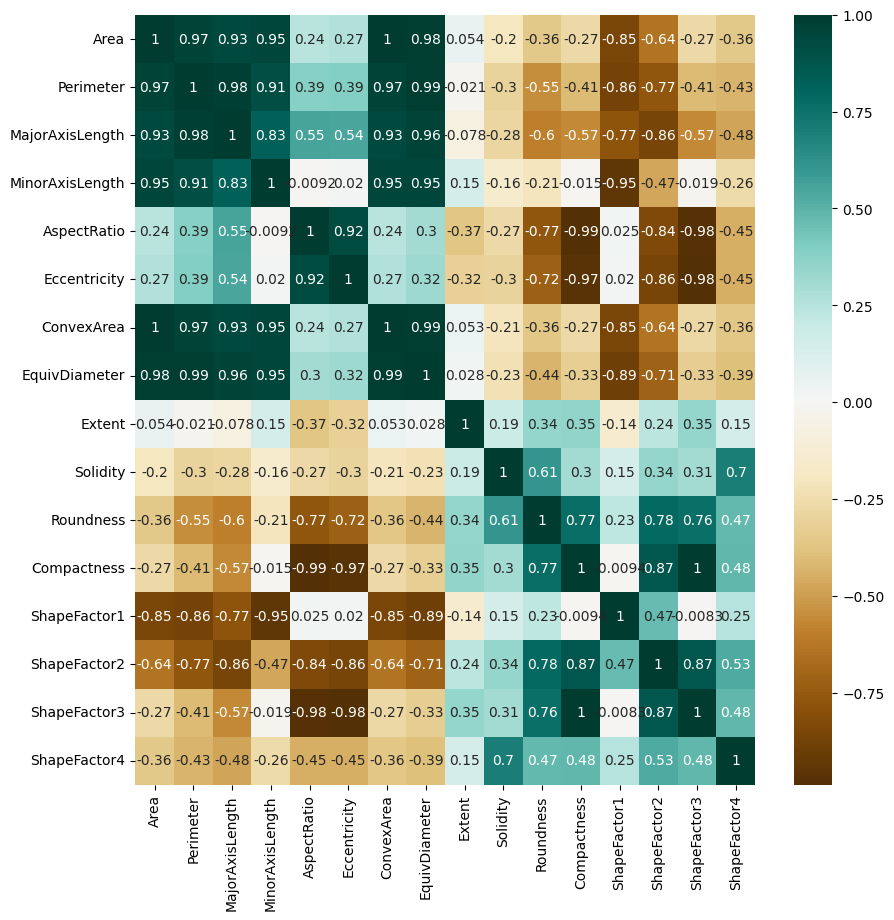

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)
plt.show()

In [ ]:
print(df["Class"])

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object


In [ ]:
t=set(df["Class"])

y=df["Class"]
print(len(X))
print(t)

13611
{'BARBUNYA', 'HOROZ', 'BOMBAY', 'SIRA', 'DERMASON', 'CALI', 'SEKER'}


In [ ]:
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(df['Class'])
y_enc
print(set(y_enc))

{0, 1, 2, 3, 4, 5, 6}


In [ ]:
X=df.iloc[:,:-1]
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125, random_state = 0)

In [ ]:
standardS = StandardScaler()
X_train = standardS.fit_transform(X_train)
X_val = standardS.transform(X_val)
X_test = standardS.transform(X_test)

In [ ]:
bs = 128
epochs = 100

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9527, 16) (2723, 16) (9527,) (2723,)


In [ ]:

x_train_T = torch.Tensor(X_train).to(DEVICE)
y_train_T = F.one_hot(torch.tensor(y_train), num_classes=7).to(DEVICE).float()
train_data = torch.utils.data.TensorDataset(x_train_T,y_train_T)
train_data_load=torch.utils.data.DataLoader(train_data,batch_size=bs,shuffle=True)
x_val_T = torch.Tensor(X_val).to(DEVICE)
y_val_T = F.one_hot(torch.tensor(y_val), num_classes=7).to(DEVICE).float()
val_data = torch.utils.data.TensorDataset(x_val_T,y_val_T)
val_data_load=torch.utils.data.DataLoader(val_data,batch_size=bs,shuffle=True)
x_test_T = torch.Tensor(X_test).to(DEVICE)
y_test_T = F.one_hot(torch.tensor(y_test), num_classes=7).to(DEVICE).float()
test_data = torch.utils.data.TensorDataset(x_test_T,y_test_T)


In [ ]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 7)
        self.ac1 = nn.ReLU()
        self.ac2 = nn.ReLU()
        self.ac3 = nn.ReLU()
        self.ac4 = nn.Softmax(dim=-1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        return x

In [ ]:
model = Net(X.shape[1]).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses = [], []


for epoch in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    for batch in train_data_load:
      x,y = batch
      x = x.to(DEVICE)
      y = y.to(DEVICE)
      optimizer.zero_grad()
      y0 = model(x)
      loss = criterion(y0,y)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
    train_losses.append(train_loss/len(X_train))
    with torch.no_grad():
      for x,y in val_data:
          x = x.to(DEVICE)
          y = y.to(DEVICE)

          y0 = model(x)
          val_loss = criterion(y0,y)
          valid_loss += val_loss.item()
      val_losses.append(valid_loss/len(X_val))
    if (epochs>=30):
      lr = 0.0001

    print("Epoch: {}/{}.. ".format(epoch+1, epochs),
          "Training Loss: {:.3f}.. ".format(train_loss/len(train_data_load)),
          "Validation Loss: {:.3f}.. ".format(valid_loss/len(val_data_load)))



Epoch: 1/100..  Training Loss: 1.201..  Validation Loss: 50.077.. 
Epoch: 2/100..  Training Loss: 0.275..  Validation Loss: 30.922.. 
Epoch: 3/100..  Training Loss: 0.220..  Validation Loss: 28.586.. 
Epoch: 4/100..  Training Loss: 0.211..  Validation Loss: 27.051.. 
Epoch: 5/100..  Training Loss: 0.207..  Validation Loss: 27.933.. 
Epoch: 6/100..  Training Loss: 0.201..  Validation Loss: 26.821.. 
Epoch: 7/100..  Training Loss: 0.200..  Validation Loss: 28.448.. 
Epoch: 8/100..  Training Loss: 0.194..  Validation Loss: 26.720.. 
Epoch: 9/100..  Training Loss: 0.192..  Validation Loss: 26.889.. 
Epoch: 10/100..  Training Loss: 0.191..  Validation Loss: 27.018.. 
Epoch: 11/100..  Training Loss: 0.189..  Validation Loss: 26.332.. 
Epoch: 12/100..  Training Loss: 0.188..  Validation Loss: 26.678.. 
Epoch: 13/100..  Training Loss: 0.186..  Validation Loss: 26.334.. 
Epoch: 14/100..  Training Loss: 0.185..  Validation Loss: 27.477.. 
Epoch: 15/100..  Training Loss: 0.184..  Validation Loss:

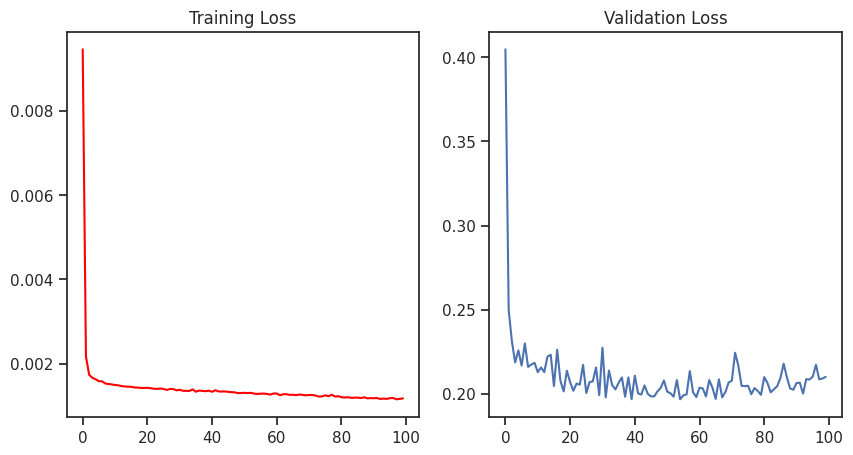

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
plt.plot(train_losses,color = "red")
plt.title("Training Loss")

fig.add_subplot(1,2,2)
plt.plot(val_losses)
plt.title("Validation Loss")
plt.show()


In [ ]:
with torch.no_grad():
    test_loss = 0.0
    y0 = model(x_test_T)

    # Here the mis-classification loss is calculated
    y1 = torch.argmax(y0,dim= -1).cpu().numpy()

    print(f'Accuracy is {sum(y1 == y_test)/len(y_test)}')


Accuracy is 0.9338964377524789
